<a href="https://colab.research.google.com/github/bwowby/DS/blob/master/nlp-basic/bm25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rank_bm25

##BM25 (Okapi BM25)
주어진 쿼리에 대해 문서와의 연관성을 평가하는 랭킹 함수로 사용되는 알고리즘.   
TFIDF의 변형식.   
다른 문서들과 비교해 무의미한 반복 등으로 긴 문서에 패널티(평균 문서 길이 반영)   
키워드 출현 빈도가 계속 커지더라도 정해진 범위의 값에 들어가도록 함(키워드 출연 비율 반영)

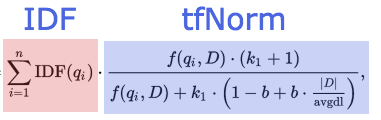

https://littlefoxdiary.tistory.com/12

In [2]:
from rank_bm25 import BM25Okapi

In [21]:
corpus = [
    "세계 배달 피자 리더 도미노피자가 우리 고구마를 활용한 신메뉴를 출시한다.",
    "도미노피자는 오는 2월 1일 국내산 고구마와 4가지 치즈가 어우러진 신메뉴 `우리 고구마 피자`를 출시하고 전 매장에서 판매를 시작한다. 이번에 도미노피자가 내놓은 신메뉴 `우리 고구마 피자`는 까다롭게 엄선한 국내산 고구마를 무스와 큐브 형태로 듬뿍 올리고, 모차렐라, 카망베르, 체더 치즈와 리코타 치즈 소스 등 4가지 치즈와 와규 크럼블을 더한 프리미엄 고구마 피자다.",
    "피자의 발상지이자 원조라고 할 수 있는 남부의 나폴리식 피자(Pizza Napolitana)는 재료 본연의 맛에 집중하여 뛰어난 식감을 자랑한다. 대표적인 나폴리 피자로는 피자 마리나라(Pizza Marinara)와 피자 마르게리타(Pizza Margherita)가 있다.",
    "도미노피자가 삼일절을 맞아 '방문포장 1+1' 이벤트를 진행한다. 이번 이벤트는 도미노피자 102개 매장에서 3월 1일 단 하루 동안 방문포장 온라인, 오프라인 주문 시 피자 1판을 더 증정하는 이벤트다. 온라인 주문 시 장바구니에 2판을 담은 후 할인 적용이 가능하며, 동일 가격 또는 낮은 가격의 피자를 고객이 선택하면 무료로 증정한다."
]

def tokenizer(sent):
  return sent.split(" ")

tokenized_corpus = [tokenizer(doc) for doc in corpus]
tokenized_corpus

[['세계', '배달', '피자', '리더', '도미노피자가', '우리', '고구마를', '활용한', '신메뉴를', '출시한다.'],
 ['도미노피자는',
  '오는',
  '2월',
  '1일',
  '국내산',
  '고구마와',
  '4가지',
  '치즈가',
  '어우러진',
  '신메뉴',
  '`우리',
  '고구마',
  '피자`를',
  '출시하고',
  '전',
  '매장에서',
  '판매를',
  '시작한다.',
  '이번에',
  '도미노피자가',
  '내놓은',
  '신메뉴',
  '`우리',
  '고구마',
  '피자`는',
  '까다롭게',
  '엄선한',
  '국내산',
  '고구마를',
  '무스와',
  '큐브',
  '형태로',
  '듬뿍',
  '올리고,',
  '모차렐라,',
  '카망베르,',
  '체더',
  '치즈와',
  '리코타',
  '치즈',
  '소스',
  '등',
  '4가지',
  '치즈와',
  '와규',
  '크럼블을',
  '더한',
  '프리미엄',
  '고구마',
  '피자다.'],
 ['피자의',
  '발상지이자',
  '원조라고',
  '할',
  '수',
  '있는',
  '남부의',
  '나폴리식',
  '피자(Pizza',
  'Napolitana)는',
  '재료',
  '본연의',
  '맛에',
  '집중하여',
  '뛰어난',
  '식감을',
  '자랑한다.',
  '대표적인',
  '나폴리',
  '피자로는',
  '피자',
  '마리나라(Pizza',
  'Marinara)와',
  '피자',
  '마르게리타(Pizza',
  'Margherita)가',
  '있다.'],
 ['도미노피자가',
  '삼일절을',
  '맞아',
  "'방문포장",
  "1+1'",
  '이벤트를',
  '진행한다.',
  '이번',
  '이벤트는',
  '도미노피자',
  '102개',
  '매장에서',
  '3월',
  '1일',
  '단',
  '하루',
  '동안',
  '방문포장',
  '온라

In [23]:
bm25 = BM25Okapi(tokenized_corpus)
bm25

In [24]:
bm25.doc_freqs

[{'고구마를': 1,
  '도미노피자가': 1,
  '리더': 1,
  '배달': 1,
  '세계': 1,
  '신메뉴를': 1,
  '우리': 1,
  '출시한다.': 1,
  '피자': 1,
  '활용한': 1},
 {'1일': 1,
  '2월': 1,
  '4가지': 2,
  '`우리': 2,
  '고구마': 3,
  '고구마를': 1,
  '고구마와': 1,
  '국내산': 2,
  '까다롭게': 1,
  '내놓은': 1,
  '더한': 1,
  '도미노피자가': 1,
  '도미노피자는': 1,
  '듬뿍': 1,
  '등': 1,
  '리코타': 1,
  '매장에서': 1,
  '모차렐라,': 1,
  '무스와': 1,
  '소스': 1,
  '시작한다.': 1,
  '신메뉴': 2,
  '어우러진': 1,
  '엄선한': 1,
  '오는': 1,
  '올리고,': 1,
  '와규': 1,
  '이번에': 1,
  '전': 1,
  '체더': 1,
  '출시하고': 1,
  '치즈': 1,
  '치즈가': 1,
  '치즈와': 2,
  '카망베르,': 1,
  '큐브': 1,
  '크럼블을': 1,
  '판매를': 1,
  '프리미엄': 1,
  '피자`는': 1,
  '피자`를': 1,
  '피자다.': 1,
  '형태로': 1},
 {'Margherita)가': 1,
  'Marinara)와': 1,
  'Napolitana)는': 1,
  '나폴리': 1,
  '나폴리식': 1,
  '남부의': 1,
  '대표적인': 1,
  '뛰어난': 1,
  '마르게리타(Pizza': 1,
  '마리나라(Pizza': 1,
  '맛에': 1,
  '발상지이자': 1,
  '본연의': 1,
  '수': 1,
  '식감을': 1,
  '원조라고': 1,
  '있는': 1,
  '있다.': 1,
  '자랑한다.': 1,
  '재료': 1,
  '집중하여': 1,
  '피자': 2,
  '피자(Pizza': 1,
  '피자로는': 1,
  '피자의': 1,
  

In [25]:
bm25.doc_len

[10, 50, 27, 47]

In [26]:
bm25.idf

{"'방문포장": 0.8472978603872037,
 "1+1'": 0.8472978603872037,
 '102개': 0.8472978603872037,
 '1일': 0.0,
 '1판을': 0.8472978603872037,
 '2월': 0.8472978603872037,
 '2판을': 0.8472978603872037,
 '3월': 0.8472978603872037,
 '4가지': 0.8472978603872037,
 'Margherita)가': 0.8472978603872037,
 'Marinara)와': 0.8472978603872037,
 'Napolitana)는': 0.8472978603872037,
 '`우리': 0.8472978603872037,
 '가격': 0.8472978603872037,
 '가격의': 0.8472978603872037,
 '가능하며,': 0.8472978603872037,
 '고객이': 0.8472978603872037,
 '고구마': 0.8472978603872037,
 '고구마를': 0.0,
 '고구마와': 0.8472978603872037,
 '국내산': 0.8472978603872037,
 '까다롭게': 0.8472978603872037,
 '나폴리': 0.8472978603872037,
 '나폴리식': 0.8472978603872037,
 '남부의': 0.8472978603872037,
 '낮은': 0.8472978603872037,
 '내놓은': 0.8472978603872037,
 '단': 0.8472978603872037,
 '담은': 0.8472978603872037,
 '대표적인': 0.8472978603872037,
 '더': 0.8472978603872037,
 '더한': 0.8472978603872037,
 '도미노피자': 0.8472978603872037,
 '도미노피자가': 0.19915120650126542,
 '도미노피자는': 0.8472978603872037,
 '동안': 0.8472978

In [31]:
query = "1+1 이벤트"
tokenized_query = tokenizer(query)
tokenized_query

['1+1', '이벤트']

In [32]:
doc_scores = bm25.get_scores(tokenized_query)
doc_scores

array([0., 0., 0., 0.])

In [34]:
# 점수에 따른 상위 n개 문서를 리턴
bm25.get_top_n(tokenized_query, corpus, n=1)

["도미노피자가 삼일절을 맞아 '방문포장 1+1' 이벤트를 진행한다. 이번 이벤트는 도미노피자 102개 매장에서 3월 1일 단 하루 동안 방문포장 온라인, 오프라인 주문 시 피자 1판을 더 증정하는 이벤트다. 온라인 주문 시 장바구니에 2판을 담은 후 할인 적용이 가능하며, 동일 가격 또는 낮은 가격의 피자를 고객이 선택하면 무료로 증정한다."]